In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.clustering import *

In [2]:
%cd ..\data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [3]:
data = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
data.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,...,Housing_Mobile house,Housing_One-family house,Housing_Two-family house/ duplex,Religious_Attendance_0,Religious_Attendance_A few times a year,Religious_Attendance_Once or twice a month,Religious_Attendance_Seldom,Status_of_Ownership_3,Status_of_Ownership_Own,Status_of_Ownership_Rent
0,80314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,60171,60.0,13.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1011601,23.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,50046,73.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,10494,29.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = data.drop(['Survey_ID', 'Quality_of_Life','Satisfied_With_Life_1','Satisfied_With_Life_2'],axis=1)

In [5]:
reg = setup(data = data, 
            categorical_features = [
                'No_One','Grandparent',
                'Other_Relative',
                'Other',
                'Self_Employed_Full_Time',
                'Self_Employed_Part_Time',
                'Disabled','Unemployed',
                'Other_Employement',
                'Psychiatrist',
                'Therapist/Counselor'],
           pca=True,
           pca_components=10)

Setup Succesfully Completed!


,Description,Value
0,session_id,7570
1,Original Data,"(2609, 248)"
2,Missing Values,False
3,Numeric Features,65
4,Categorical Features,183
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(2609, 10)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


,Metric
Silhouette,0.7855
Calinski-Harabasz,34324.1264
Davies-Bouldin,0.4393


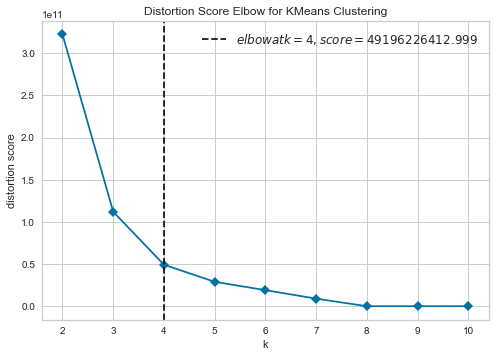

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\reports\figures


AttributeError: 'NoneType' object has no attribute 'savefig'

In [6]:
kmeans = create_model('kmeans')
%cd ..\..\reports\figures
plot_model(kmeans, plot='elbow', save=True)

In [17]:
kmeans_4 = create_model('kmeans', num_clusters = 4)
kmeans4_df = assign_model(kmeans_4)

In [20]:
kmeans_8 = create_model('kmeans', num_clusters = 4)
kmeans8_df = assign_model(kmeans_8)

In [21]:
kmeans_tuned = tune_model(model = 'kmeans', supervised_target = 'Satisfaction_Score', estimator='rf')

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: K-Means Clustering | Number of Clusters: 25 | R2 : 0.1803


In [32]:
kmeans4_df

0       Cluster 0
1       Cluster 2
2       Cluster 0
3       Cluster 0
4       Cluster 0
          ...    
2604    Cluster 2
2605    Cluster 1
2606    Cluster 0
2607    Cluster 0
2608    Cluster 1
Name: Cluster, Length: 2609, dtype: object

In [34]:
kmeans8_df = kmeans8_df['Cluster']
kmeans8_df

0       Cluster 0
1       Cluster 2
2       Cluster 0
3       Cluster 0
4       Cluster 0
          ...    
2604    Cluster 2
2605    Cluster 1
2606    Cluster 0
2607    Cluster 0
2608    Cluster 1
Name: Cluster, Length: 2609, dtype: object

In [37]:
kmeans_df = assign_model(kmeans_tuned)
columns = list(kmeans_df.columns)
columns.append('Cluster_4')
columns.append('Cluster_8')
kmeans_df = pd.concat([kmeans_df, kmeans4_df], axis = 1, ignore_index=True)
kmeans_df = pd.concat([kmeans_df, kmeans8_df], axis = 1, ignore_index=True)
kmeans_df.columns=columns
kmeans_df

,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,...,Religious_Attendance_0,Religious_Attendance_A few times a year,Religious_Attendance_Once or twice a month,Religious_Attendance_Seldom,Status_of_Ownership_3,Status_of_Ownership_Own,Status_of_Ownership_Rent,Cluster,Cluster_4,Cluster_8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,Cluster 2,Cluster 0,Cluster 0
1,60.0,13.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,Cluster 4,Cluster 2,Cluster 2
2,23.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,Cluster 2,Cluster 0,Cluster 0
3,73.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,Cluster 16,Cluster 0,Cluster 0
4,29.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,Cluster 2,Cluster 0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,70.0,17.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,Cluster 23,Cluster 2,Cluster 2
2605,68.0,17.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,Cluster 6,Cluster 1,Cluster 1
2606,76.0,13.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,1,0,1,0,0,Cluster 15,Cluster 0,Cluster 0
2607,50.0,17.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,Cluster 15,Cluster 0,Cluster 0


In [38]:
%cd ..\..\data\processed
kmeans_df.to_csv('PyCaret Clusters Dataframe.csv')

[WinError 3] The system cannot find the path specified: '..\\..\\data\\processed'
C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models


In [39]:
%cd ..\..\models
save_model(kmeans_tuned, 'PyCaret Clustering Model')

[WinError 2] The system cannot find the file specified: '..\\..\\models'
C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models
Transformation Pipeline and Model Succesfully Saved
